1.	Analysis Planning  
a)	Asserting our goal: The goal is to create a linear regression model  that provides a sliding scale of charges according to the different features
b)	EDA - Exploratory Data Analysis:
•	View the columns.
•	Check for missing data.
•	Understand data types (numeric, categorical).
•	Look at basic stats (mean, median, min, max, standard deviation).
•	Plot simple visualizations: histograms (for distribution of features), boxplots (to check for outliers)

c)	Data Cleaning
•	Check for and handle missing data (included in EDA phase)
•	Encode categorical variables (Sex, Smoker, Region using One-Hot Encoding)
•	Remove or correct obvious outliers if they are errors.

d)	 Feature Selection,
•	 Figuring out: Which variables actually matter for predicting charges. Use methods like correlation matrix (for numerical variables), SelectKBest and visualizations (boxplots comparing smoker/non-smoker charge

e)	 Model Building
•	Since charges are continuous and the question explicitly asked for Linear Regression, that is what I’ll do.

f)	 Model Evaluation
•	I'd split the data: Train/Test split 80/20.
•	Measure model performance: R² score (how much variation is explained), RMSE / MAE (error metrics).
•	Predicted vs Actual charges (scatterplot).

g)	 Final Insights
•	Write a summary
•	Suggest real-world actions based on findings


EXPlORATORY DATA ANALYSIS

In [ ]:
#import libaries
#code taken from youtube
#https://www.youtube.com/watch?v=qfDJI9vdWX8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Load and show data
#code taken from youtube
#https://www.youtube.com/watch?v=qfDJI9vdWX8
data= pd.read_csv('/content/drive/MyDrive/insurance.csv') #opload dataset on notebook under sample data folder
data.head() #show 1st 5 rows of dataset including headings


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#check for missing values and count (also part of data cleaning)
#code taken from youtube
#https://www.youtube.com/watch?v=qfDJI9vdWX8
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
#code taken from
#https://www.youtube.com/watch?v=qfDJI9vdWX8
# View the shape of the dataset (rows, columns)
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# View column names and data types
print(data.dtypes)

# Summary statistics for numerical features
print(data.describe())

# Summary statistics for categorical features
print(data.describe(include=['O']))  # 'O' stands for 'object' (categorical variables)



Dataset contains 1338 rows and 7 columns.
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


In [ ]:

#handling categorical values (also part of data Cleaning)
#code taken from
#https://www.youtube.com/watch?v=qfDJI9vdWX8

df_encoded = pd.get_dummies(data, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


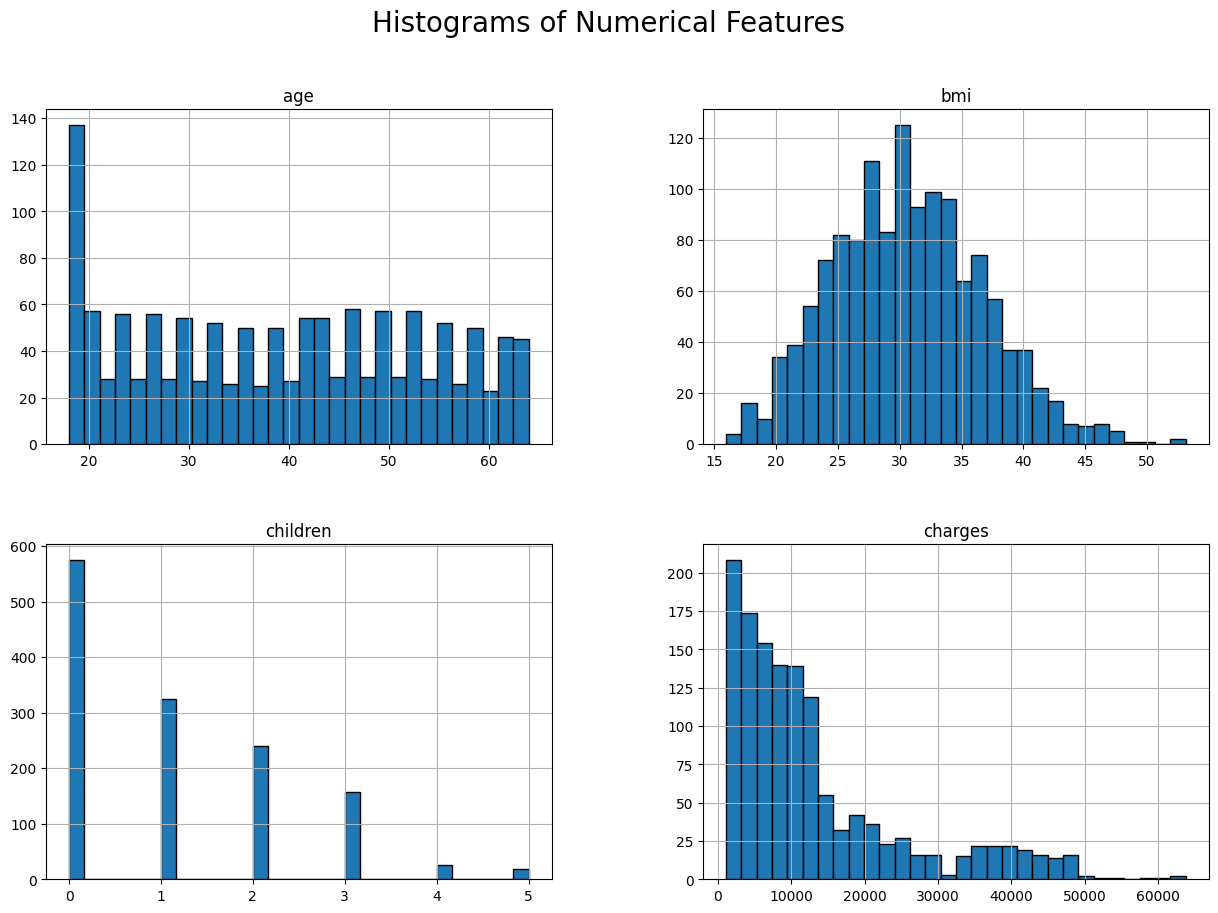

In [ ]:
import matplotlib.pyplot as plt

#code taken from youtube
#https://www.youtube.com/watch?v=ntBa7YKc9XM
# Plot histograms for each numerical column
data.hist(bins=30, figsize=(15, 10), edgecolor='black') #automatically select numeric features
plt.suptitle('Histograms of Numerical Features', fontsize=20)
plt.show()

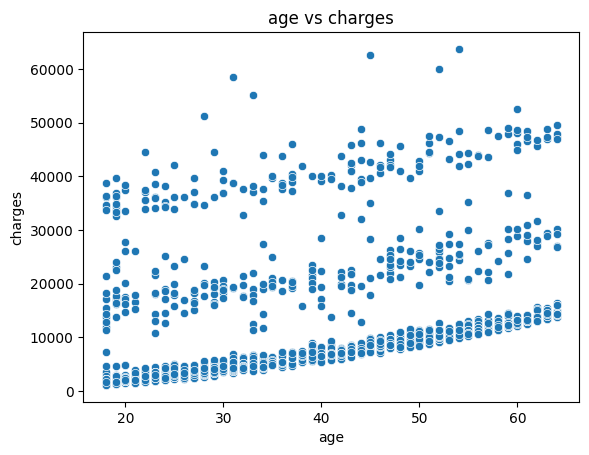

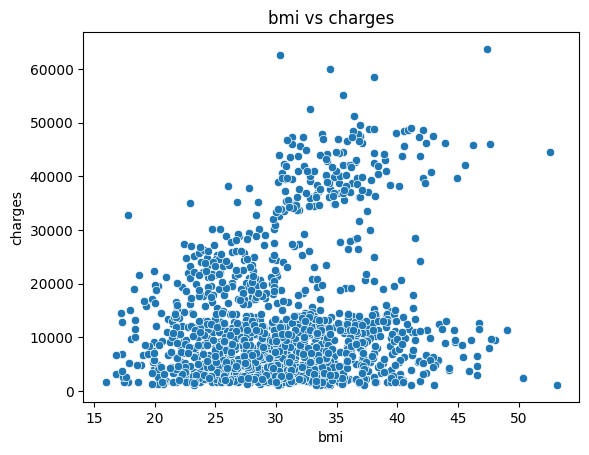

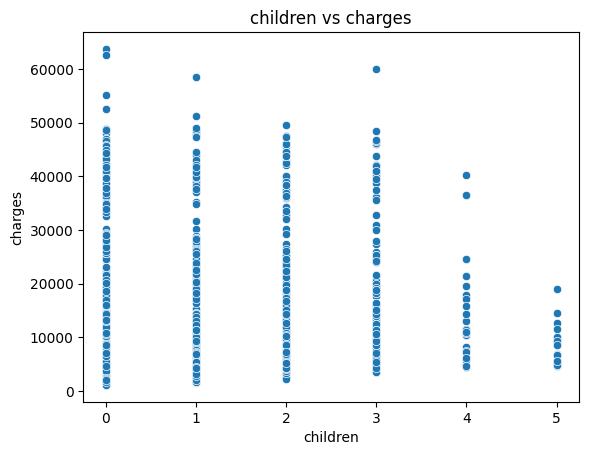

In [ ]:
#Bivariate Analysis
#code taken from kaggle
#https://www.kaggle.com/code/analyticaobscura/medical-cost-analysis


#only continous values will be included when checking for linearity
#sex, smoker and region are categorical values so will not be included

features= ['age', 'bmi', 'children']
for col in features:
  sns.scatterplot(x=col, y='charges', data=data)
  plt.title(f'{col} vs charges')
  plt.show()


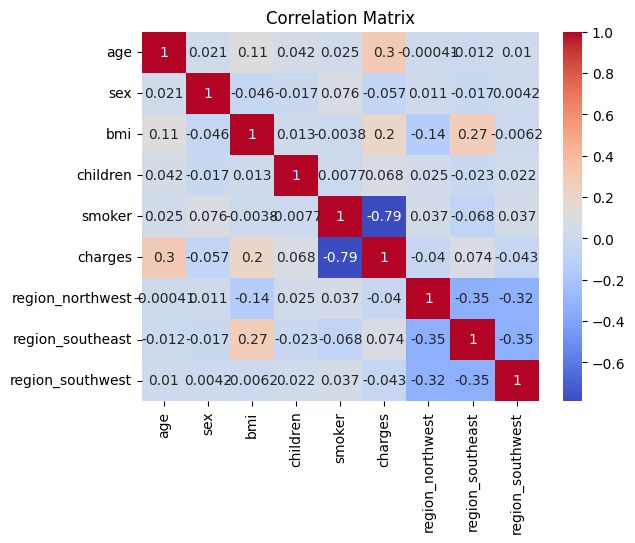

In [ ]:
#checking for multicolinearity(if variables are correlated with each other)
#code taken from kaggle
#https://www.kaggle.com/code/alireza151/ai-course-session-4-visualization

corr=df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

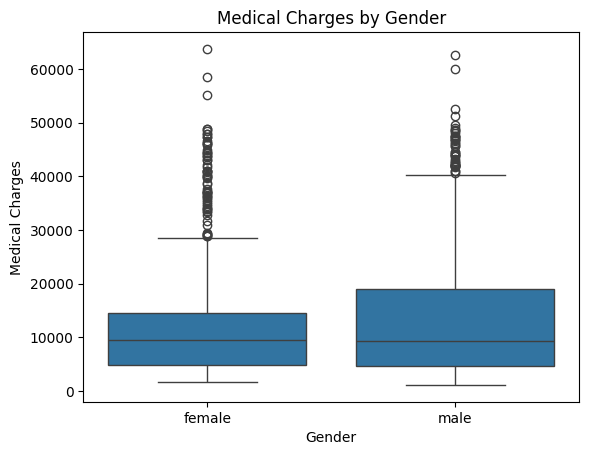

In [ ]:

#Comparing medical charges between genders
#code taken from kaggle
#https://www.kaggle.com/code/alireza151/ai-course-session-4-visualization
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Medical Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Medical Charges')
plt.show



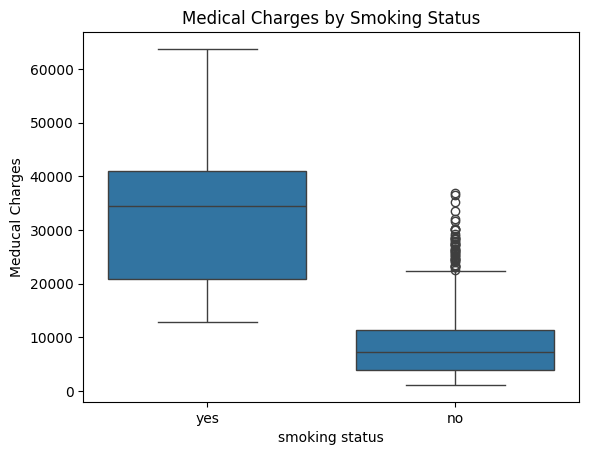

In [ ]:
#Comparing Medical charges between smokers and non smokers
#code taken from kaggle
#https://www.kaggle.com/code/alireza151/ai-course-session-4-visualization

sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Medical Charges by Smoking Status')
plt.xlabel('smoking status')
plt.ylabel('Meducal Charges')
plt.show()

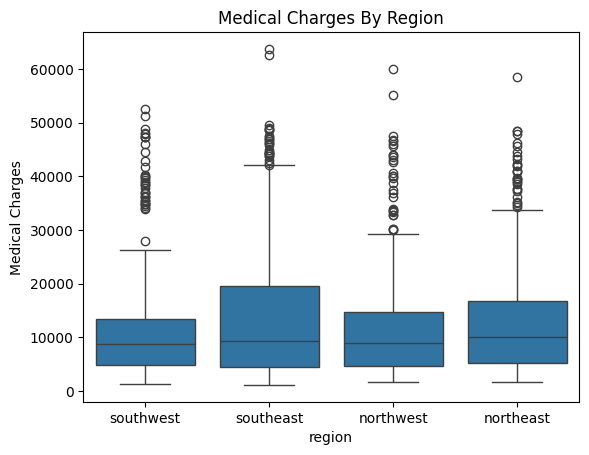

In [ ]:
#comparing charges my medical by region
#code taken from kaggle
#https://www.kaggle.com/code/alireza151/ai-course-session-4-visualization
sns.boxplot(x='region', y='charges', data=data)
plt.title('Medical Charges By Region')
plt.xlabel('region')
plt.ylabel('Medical Charges')
plt.show()

Creating pie charts to visualize:percantage of males to females, smokers vs non smokers and region and the chargers each group pays per category

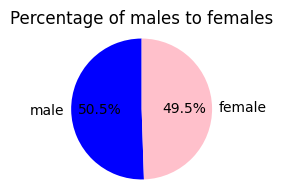

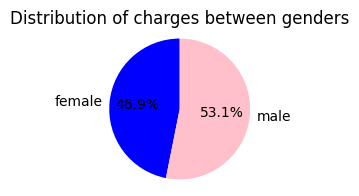

In [ ]:
#pie chart visualizing percentage of male to females in dataset
#code taken from kaggle
#https://www.kaggle.com/code/alireza151/ai-course-session-4-visualization

#calculating mean
male_mean = data['sex'].value_counts()['male']
female_mean = data['sex'].value_counts()['female']
total_mean = male_mean + female_mean

#count males to females
gender_counts=data['sex'].value_counts()

#label and coluours of pie chart
labels=gender_counts.index
sizes=gender_counts.values
colors=['blue', 'pink']

#create pie chart
plt.figure(figsize=(2,2))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of males to females')
plt.axis('equal')
plt.show()

#Distribution of charges between genders

#group by gender and sum charges
charges_by_gender=data.groupby('sex')['charges'].sum()

#labels and values
labels=charges_by_gender.index
sizes=charges_by_gender.values
colors=['blue', 'pink']

#create pie chart
plt.figure(figsize=(2,2))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of charges between genders')
plt.axis('equal')
plt.show()



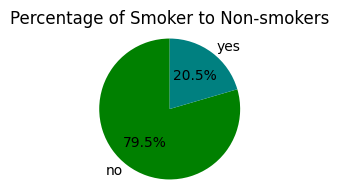

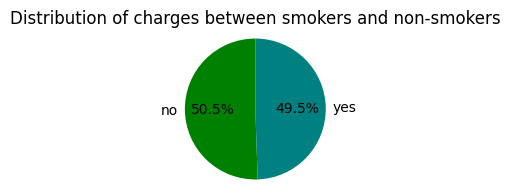

In [ ]:
#pie chart visualizing percentage of smokers to non-smokers in dataset
#code taken from kaggle
#https://www.kaggle.com/code/alireza151/ai-course-session-4-visualization

#calculating mean for smokers
smokers_mean = data['smoker'].value_counts().get('smoker',0)
non_smokers_mean = data['smoker'].value_counts().get('non-smoker',0)
total_mean = smokers_mean + non_smokers_mean

#count smoker to non smoker
smoker_counts=data['smoker'].value_counts()

#label and coluours of pie chart
labels=smoker_counts.index
sizes=smoker_counts.values
colors=['green', 'teal']

#create pie chart
plt.figure(figsize=(2,2))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Smoker to Non-smokers')
plt.axis('equal')
plt.show()

#Distribution of charges between smoker status

#group by smoker status and sum charges
charges_by_smoker_status=data.groupby('smoker')['charges'].sum()

#labels and values
labels=charges_by_smoker_status.index
sizes=charges_by_smoker_status.values
colors=['green', 'teal']

#create pie chart
plt.figure(figsize=(2,2))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of charges between smokers and non-smokers')
plt.axis('equal')
plt.show()



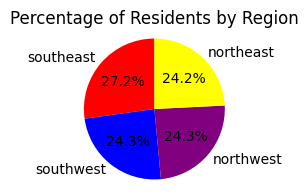

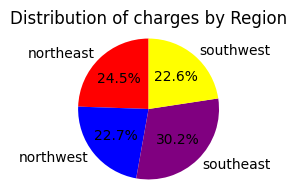

In [ ]:
#pie chart visualizing percentage of residents in each region
#code taken from kaggle
#https://www.kaggle.com/code/alireza151/ai-course-session-4-visualization

#calculating mean for region
southwest_mean = data['region'].value_counts().get('southwest',0)
northwest_mean = data['region'].value_counts().get('northwest',0)
southeast_mean = data['region'].value_counts().get('southeast',0)
northeast_mean = data['region'].value_counts().get('northeast',0)

total_mean = southwest_mean + northwest_mean + southeast_mean + northeast_mean

#count residents in each region
region_counts=data['region'].value_counts()

#label and coluours of pie chart
labels=region_counts.index
sizes=region_counts.values
colors=['red', 'blue','purple', 'yellow']

#create pie chart
plt.figure(figsize=(2,2))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Residents by Region')
plt.axis('equal')
plt.show()

#Distribution of charges by region

#group by region and sum charges
region_order = ['northeast', 'northwest', 'southwest', 'southeast'] #arranging regions in a specific order
charges_by_region=data.groupby('region')['charges'].sum()

#labels and values
labels=charges_by_region.index
sizes=charges_by_region.values
colors=['red', 'blue','purple', 'yellow']

#create pie chart
plt.figure(figsize=(2,2))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of charges by Region')
plt.axis('equal')
plt.show()

**Data Cleaning**

In [ ]:
#Removing outliers
# Calculate IQR for each numerical feature
Q1 = data.select_dtypes(include=np.number).quantile(0.25) #select only numeric data types
Q3 = data.select_dtypes(include=np.number).quantile(0.75) #select only numeric data types
IQR = Q3 - Q1

# Define a mask for outliers
mask = ~((data.select_dtypes(include=np.number) < (Q1 - 1.5 * IQR)) | (data.select_dtypes(include=np.number) > (Q3 + 1.5 * IQR))).any(axis=1)#select only numeric data types

# Apply the mask to keep only non-outlier rows
data_clean = data[mask]

# View the new shape after removing outliers
print("Original data shape:", data.shape)
print("New data shape after removing outliers:", data_clean.shape)

Original data shape: (1338, 7)
New data shape after removing outliers: (1193, 7)


**Building Model**


In [ ]:
#Fitting a Linear Regression Model
#code taken from youtube
#https://www.youtube.com/watch?v=R15LjD8aCzc

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#define x and y
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

#train-test split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)
X = sm.add_constant(X)

#train model
model = sm.OLS(y, X).fit()
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
#checking if all values are numeric
#code taken from Youtube
#https://www.youtube.com/watch?v=wnUlTfGe4H4
print(X.dtypes)
print(y.dtypes)


const               float64
age                   int64
bmi                 float64
children              int64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object
float64


In [ ]:
#checking if all values are numeric
#code taken from youtube
#https://www.youtube.com/watch?v=wnUlTfGe4H4
print(X.dtypes)
print(y.dtypes)


age                   int64
bmi                 float64
children              int64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object
float64


In [ ]:
#sex, smoker, and region have boolean values
#convert all boolean vlaues to intergers
for columns in X.columns:
  if X[columns].dtype == 'bool':
    X[columns] = X[columns].astype(int)

In [ ]:
#backing up my work on drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading my dataset from drive after it dissapeared from the temporary file
#code taken from youtube

path='/content/drive/MyDrive/insurance.csv'
data=pd.read_csv(path)



In [ ]:
#checking if all values are numeric
#code taken from youtube
#https://www.youtube.com/watch?v=wnUlTfGe4H4
print(X.dtypes)
print(y.dtypes)

const               float64
age                   int64
bmi                 float64
children              int64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object
float64


In [ ]:
#sex, smoker, and region have boolean values
#converting all boolean vlaues to intergers
for columns in X.columns:
  if X[columns].dtype == 'bool':
    X[columns] = X[columns].astype(int)



In [ ]:
#converting to numeric

X = X.astype(int)

In [ ]:
#fitting a linear regression model 2nd try after value error
#code taken from youtube
#https://www.youtube.com/watch?v=R15LjD8aCzc
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#define X and y
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

#train-test split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)
X = sm.add_constant(X)

#train model
model = sm.OLS(y, X).fit()
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
#sex, smoker, and region have boolean values
#converting all boolean vlaues to intergers 2nd try
for columns in X.columns:
  if X[columns].dtype == 'bool':
    X[columns] = X[columns].astype(int)


In [ ]:
#checking data type again
#code taken from youtube
#https://www.youtube.com/watch?v=wnUlTfGe4H4
print(X.dtypes)
print(y.dtypes)

const               float64
age                   int64
bmi                 float64
children              int64
sex_male              int64
smoker_yes            int64
region_northwest      int64
region_southeast      int64
region_southwest      int64
dtype: object
float64


In [ ]:
#showing data
#code taken from youtube
#https://www.youtube.com/watch?v=wnUlTfGe4H4
np.asarray(data)

array([[19, 'female', 27.9, ..., 'yes', 'southwest', 16884.924],
       [18, 'male', 33.77, ..., 'no', 'southeast', 1725.5523],
       [28, 'male', 33.0, ..., 'no', 'southeast', 4449.462],
       ...,
       [18, 'female', 36.85, ..., 'no', 'southeast', 1629.8335],
       [21, 'female', 25.8, ..., 'no', 'southwest', 2007.945],
       [61, 'female', 29.07, ..., 'yes', 'northwest', 29141.3603]],
      dtype=object)

In [ ]:
#fitting a linear regression model 3rd try after value error
#code taken from youtube
#https://www.youtube.com/watch?v=R15LjD8aCzc

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# fit the model
# default parameters will be used

# Define X and y
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Evaluate Model**

In [ ]:
# Get the model parameters
#code taken from youtube
#https://www.youtube.com/watch?v=R15LjD8aCzc

# Intercept and coefficients help interpret the linear model
print("Intercept:", model.intercept_)  # y-intercept
print("Coefficients:", model.coef_)    # Slope values for each feature

# Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model
# R² score tells us how much of the variance in y is explained by X
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R² Score:", r2_score(y_test, y_pred))              # Coefficient of Determination
print("MAE (Mean Absolute Error):", mean_absolute_error(y_test, y_pred))
print("MSE (Mean Squared Error):", mean_squared_error(y_test, y_pred))
import numpy as np
print("RMSE (Root Mean Squared Error):", np.sqrt(mean_squared_error(y_test, y_pred)))


Intercept: 0.0
Coefficients: [  204.756577      64.60183135   220.19491963  -628.25279411
 23123.25585791 -1572.56318406  -894.49288817 -1673.43425516]
R² Score: 0.758177593603668
MAE (Mean Absolute Error): 4286.8146486181495
MSE (Mean Squared Error): 37542621.83931868
RMSE (Root Mean Squared Error): 6127.203427283827


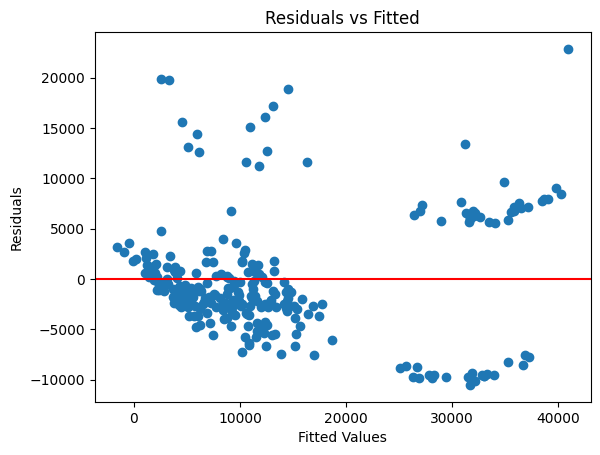

In [ ]:
#checking residuals for homoscedasticity
#code taken from kaggle
#https://www.kaggle.com/code/alireza151/ai-course-session-4-visualization


residuals = y_test - model.predict(X_test)
fitted = model.predict(X_test)

plt.scatter(fitted, residuals)
plt.axhline(y=0, color='red')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()


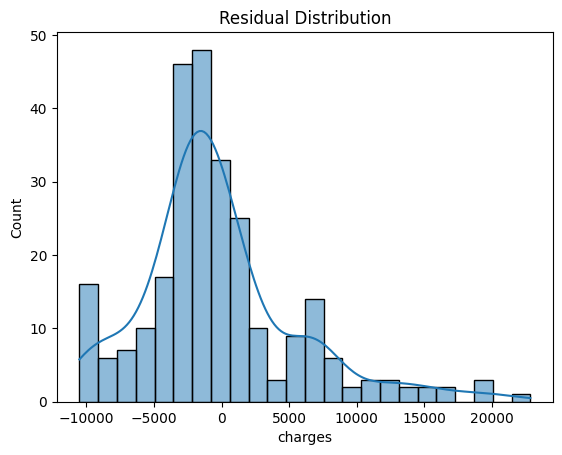

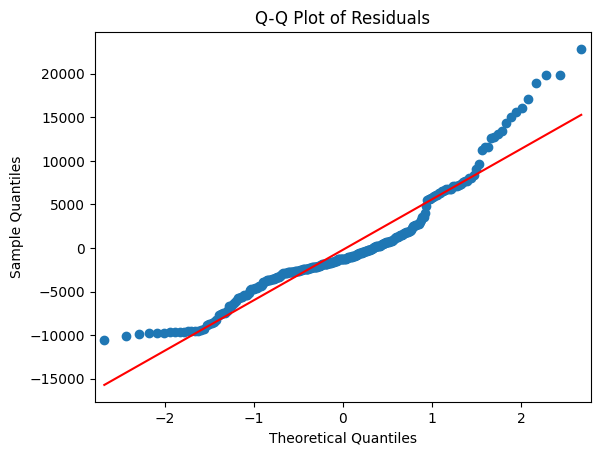

In [ ]:
#checking for normality of residuals
#code taken from youtube
#https://www.youtube.com/watch?v=Ek4fdRwBejc

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#histogram
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

# Q-Q Plot
#code taken from kaggle
#https://www.kaggle.com/code/alireza151/ai-course-session-4-visualization

sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()


In [ ]:
#retraining the model
#code taken from  youtube
#https://www.youtube.com/watch?v=qfDJI9vdWX8
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np #import numpy to use sqrt function

# 1. Prepare your data
X = data.drop(columns=['charges'])  # Features
y = data['charges']                 # Target

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize the model with different parameters
model = LinearRegression(fit_intercept=False, n_jobs=1)  # changed parameters!

# 3. Train the model
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Evaluate the model
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print('R² Score:', r2_score(y_test, y_pred))
print('MAE (Mean Absolute Error):', mean_absolute_error(y_test, y_pred))
print('MSE (Mean Squared Error):', mean_squared_error(y_test, y_pred))
print('RMSE (Root Mean Squared Error):', np.sqrt(mean_squared_error(y_test, y_pred))) # Calculate RMSE using NumPy's sqrt function

Intercept: 0.0
Coefficients: [  204.756577      64.60183135   220.19491963  -628.25279411
 23123.25585791 -1572.56318406  -894.49288817 -1673.43425516]
R² Score: 0.758177593603668
MAE (Mean Absolute Error): 4286.8146486181495
MSE (Mean Squared Error): 37542621.83931868
RMSE (Root Mean Squared Error): 6127.203427283827


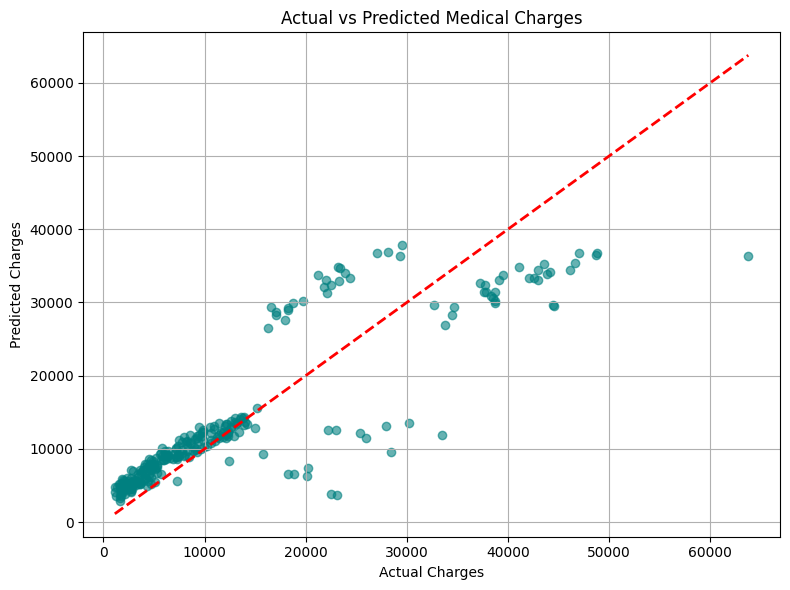

In [ ]:
import matplotlib.pyplot as plt

#plotting actual values against predicted
#code taken from youtube
#https://www.youtube.com/watch?v=ntBa7YKc9XM

y_pred = model.predict(X_test)  # Replace with your test data if named differently

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree reference line
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.grid(True)
plt.tight_layout()
plt.show()


**Feature Selection**

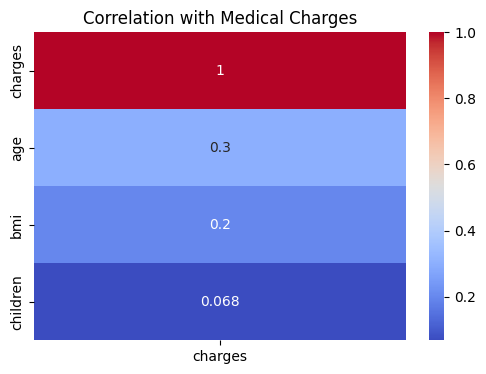

In [ ]:
#feature selection
#Code taken from Youtube
#https://www.youtube.com/watch?v=iJ5c-XoHPFo
# Only numeric features
numeric_features = data.select_dtypes(include=['int64', 'float64'])

# Correlation with charges
correlation_matrix = numeric_features.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix[['charges']].sort_values(by='charges', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Medical Charges')
plt.show()




In [ ]:
#selecting the top k features statistically most relevant to predicting charges
#code taken from
#https://www.youtube.com/watch?v=VBOoiR0uOck
#import library
from sklearn.feature_selection import SelectKBest, f_regression

# One-hot encode categorical variables
df_encoded = pd.get_dummies(data, drop_first=True)

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')  # Use 'all' to score everything
selector.fit(X, y)

# Show scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)

            Feature        Score
4        smoker_yes  2177.614868
0               age   131.174013
1               bmi    54.709308
6  region_southeast     7.352531
2          children     6.206037
3          sex_male     4.399702
7  region_southwest     2.499121
5  region_northwest     2.130837
